In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.constants import CSV_FILE
from src.data_utils import load_data, drop_columns
# from src.ml_utils import
# from src.viz_utils import seaborn as sns

In [2]:
df = load_data()
print(df.shape)


CSV file Loaded: D:\future_code\data\Book1 (1).csv
(191, 21)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 21 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   country                                       191 non-null    object
 1   total_data_centers                            191 non-null    int64 
 2   hyperscale_data_centers                       191 non-null    object
 3   colocation_data_centers                       191 non-null    object
 4   floor_space_sqft_total                        191 non-null    object
 5   power_capacity_MW_total                       191 non-null    object
 6   average_renewable_energy_usage_percent        191 non-null    object
 7   tier_distribution                             179 non-null    object
 8   key_operators                                 170 non-null    object
 9   cloud_provider                                149 non-null    object
 10  in

In [4]:
# df.select_dtypes(include="object")


In [4]:
print("\n--- Sample ---")
df.sample(5)


--- Sample ---


,country,total_data_centers,hyperscale_data_centers,colocation_data_centers,floor_space_sqft_total,power_capacity_MW_total,average_renewable_energy_usage_percent,tier_distribution,key_operators,cloud_provider,...,avg_latency_to_global_hubs_ms,number_of_fiber_connections,growth_rate_of_data_centers_percent_per_year,cooling_technologies_common,regulatory_challenges_or_limits,disaster_recovery_sites_common,green_dc_initiatives_description,source_of_data,Unnamed: 19,Unnamed: 20
23,Andorra,1,0,1,"~1,830",20,Unknown,Tier I–II single colocation,Data Center @ La Massana (Andorra Telecom),NaN,...,Unknown,Unknown,7%,Unknown,Unknown,Monopoly telco oversight; secure fiber deployment,Unknown,"InRow cooling, UPS, HFC227 fire suppression",Data center sized ~170 m² built in 2008,DataReportal; Andorra Telecom; Internet Society
44,Burkina Faso,3,0,3,"281,991",Unknown,Unknown,Mix of Tier III (major) & Tier III modular,"Virtix (Ouaga), BFIX Immeuble du Faso, BFIX Mi...",NaN,...,Unknown,1 IXP (BFIX); Unknown ASNs,~10% growth,Unknown,Grid/back-up power challenges; telecom tower s...,Carrier-neutral connectivity; N+1 redundancy,Waste‑to‑energy 12 MW DC planned Nov 2025; Vir...,DataCenterjournal; Datacentermap; DCDyn; Wikip...,NaN,NaN
123,Moldova,7,0,7,0,0,0.00,NaN,NaN,No global hyperscale presence,...,133.96,48.29,0%,"Mobile 3G/4G/5G, fiber, satellite","High infrastructure costs, limited fixed broad...",NaN,NaN,"Internet Society Pulse, DataReportal",NaN,NaN
48,Cape Verde,1,0,1,Unknown,Unknown,Unknown,Tier II–III modular gov/private NOG/tech park,NOSi national DC at Tech Park,NaN,...,Unknown,1 IXP; 7 ASNs,Unknown,Unknown,Poor upstream diversity; small market,Government & public-private park focus; DR on ...,Tier II modular gov DC; two new renewable-powe...,Data from Internet Society Pulse; DCDyn; Datac...,NaN,NaN
67,Egypt,7,0,4,"25,000-40,000",5,30-35%,Mostly Tier II and III,"CNT, GCI, local ISPs","No local hyperscale; regional AWS, Azure",...,150-180 ms to US East Coast,Limited international fiber,7-10%,"Air cooling, some energy-efficient","Power reliability, import duties, limited cert...",0,"Hydropower usage, move to energy-efficient tech","Telecom reports, regional market studies (2023...",NaN,NaN


### Data Cleaning

In [5]:
df.columns.tolist()

['country',
 'total_data_centers',
 'hyperscale_data_centers',
 'colocation_data_centers',
 'floor_space_sqft_total',
 'power_capacity_MW_total',
 'average_renewable_energy_usage_percent',
 'tier_distribution',
 'key_operators',
 'cloud_provider',
 'internet_penetration_percent',
 'avg_latency_to_global_hubs_ms',
 'number_of_fiber_connections',
 'growth_rate_of_data_centers_percent_per_year',
 'cooling_technologies_common',
 'regulatory_challenges_or_limits',
 'disaster_recovery_sites_common',
 'green_dc_initiatives_description',
 'source_of_data',
 'Unnamed: 19',
 'Unnamed: 20']

In [6]:
pd.set_option('display.max_rows', None)
print(df['tier_distribution'].value_counts())


tier_distribution
Tier III (majority)                                                                                   16
Tier III (majority), some Tier II/IV                                                                   8
Mostly Tier II                                                                                         7
Tier III (majority), some Tier IV                                                                      6
II:30%, III:60%, IV:10%                                                                                6
II:20%, III:70%, IV:10%                                                                                5
Tier III (majority ISP-grade)                                                                          4
Tier II–III (colos & ISP-grade)                                                                        3
Tier III (majority) & emerging Tier IV                                                                 3
Mix of Tier III & II                 

In [7]:
print("\n--- Dropping Columns ---")
df = drop_columns(df)


--- Dropping Columns ---
Dropping columns: ['source_of_data', 'Unnamed: 19', 'Unnamed: 20']


In [9]:
print("\n--- MISSING VALUES ---")
print(df.isnull().sum())


--- MISSING VALUES ---
country                                          0
total_data_centers                               0
hyperscale_data_centers                          0
colocation_data_centers                          0
floor_space_sqft_total                           0
power_capacity_MW_total                          0
average_renewable_energy_usage_percent           0
tier_distribution                               12
key_operators                                   21
cloud_provider                                  42
internet_penetration_percent                     0
avg_latency_to_global_hubs_ms                    0
number_of_fiber_connections                      0
growth_rate_of_data_centers_percent_per_year     2
cooling_technologies_common                      1
regulatory_challenges_or_limits                  0
disaster_recovery_sites_common                  13
green_dc_initiatives_description                26
dtype: int64


In [8]:
print("\n -- Duplicated Rows ---")
print(df.duplicated().sum())
df = df.drop_duplicates()
print("After dropping duplicates:", df.duplicated().sum())


 -- Duplicated Rows ---
0
After dropping duplicates: 0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   country                                       191 non-null    object
 1   total_data_centers                            191 non-null    int64 
 2   hyperscale_data_centers                       191 non-null    object
 3   colocation_data_centers                       191 non-null    object
 4   floor_space_sqft_total                        191 non-null    object
 5   power_capacity_MW_total                       191 non-null    object
 6   average_renewable_energy_usage_percent        191 non-null    object
 7   tier_distribution                             179 non-null    object
 8   key_operators                                 170 non-null    object
 9   cloud_provider                                149 non-null    object
 10  in

In [10]:
# Explore Data 
print("\n--- DESCRIBE DATA ---")
print(df.describe())



--- DESCRIBE DATA ---
       total_data_centers
count          191.000000
mean            60.685864
std            398.980748
min              0.000000
25%              1.500000
50%              4.000000
75%             20.000000
max           5426.000000


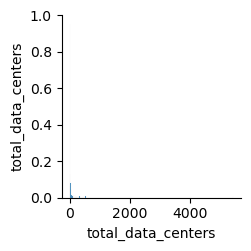

In [11]:
# Initial Scatter Matrix (Come back to this later)
sns.pairplot(df)